In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fr=pd.read_csv('init_data.csv')


In [180]:
year=[];month=[];day=[]
for line in fr['检测日期']:
    lineArr=line.split('-')
    year.append(lineArr[0])
    month.append(lineArr[1])
    day.append(lineArr[2])

fr['year']=year
fr['month']=month
fr['date']=day
fr['y_month']=fr['year']+ '-' +fr['month']

fr['label']=0
fr['label'][fr['年龄']<=12]='儿童'
fr['label'][(fr['年龄']>12)&(fr['年龄']<=24)]='青年'
fr['label'][(fr['年龄']>24)&(fr['年龄']<=60)]='中年'
fr['label'][(fr['年龄']>60)]='老年'

fr.head()



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A

,检测日期,性别,年龄,科室,树组合(柳树/杨树/榆树),普通豚草,艾蒿,尘螨组合(屋尘螨/粉尘螨),屋尘,猫毛,...,黄豆,海鱼组合1(鳕鱼/龙虾/扇贝),虾,蟹,Unnamed: 21,year,month,date,y_month,label
0,2013-10-16,女,52,呼吸科,0,0,0,0,0,0,...,0,0,0,0,NaN,2013,10,16,2013-10,中年
1,2013-10-16,女,52,皮肤科,0,0,0,0,0,0,...,0,0,0,0,NaN,2013,10,16,2013-10,中年
2,2013-10-23,男,37,皮肤科,0(-),0(-),0(-),2(+),0(-),0(-),...,0(-),0(-),0(-),0(-),NaN,2013,10,23,2013-10,中年
3,2013-10-23,女,44,皮肤科,0(-),0(-),0(-),1(±),0(-),0(-),...,0(-),0(-),0(-),3(2+),NaN,2013,10,23,2013-10,中年
4,2013-10-23,女,61,皮肤科,0(-),0(-),0(-),0(-),0(-),0(-),...,0(-),0(-),0(-),0(-),NaN,2013,10,23,2013-10,老年


In [181]:
fr=fr[['检测日期','性别','年龄','year','month','date','y_month','label']]
stat_year_month=fr.groupby(['year','month'])['label'].count().to_frame().reset_index()
stat_year_month['num']=stat_year_month.iloc[:,2]


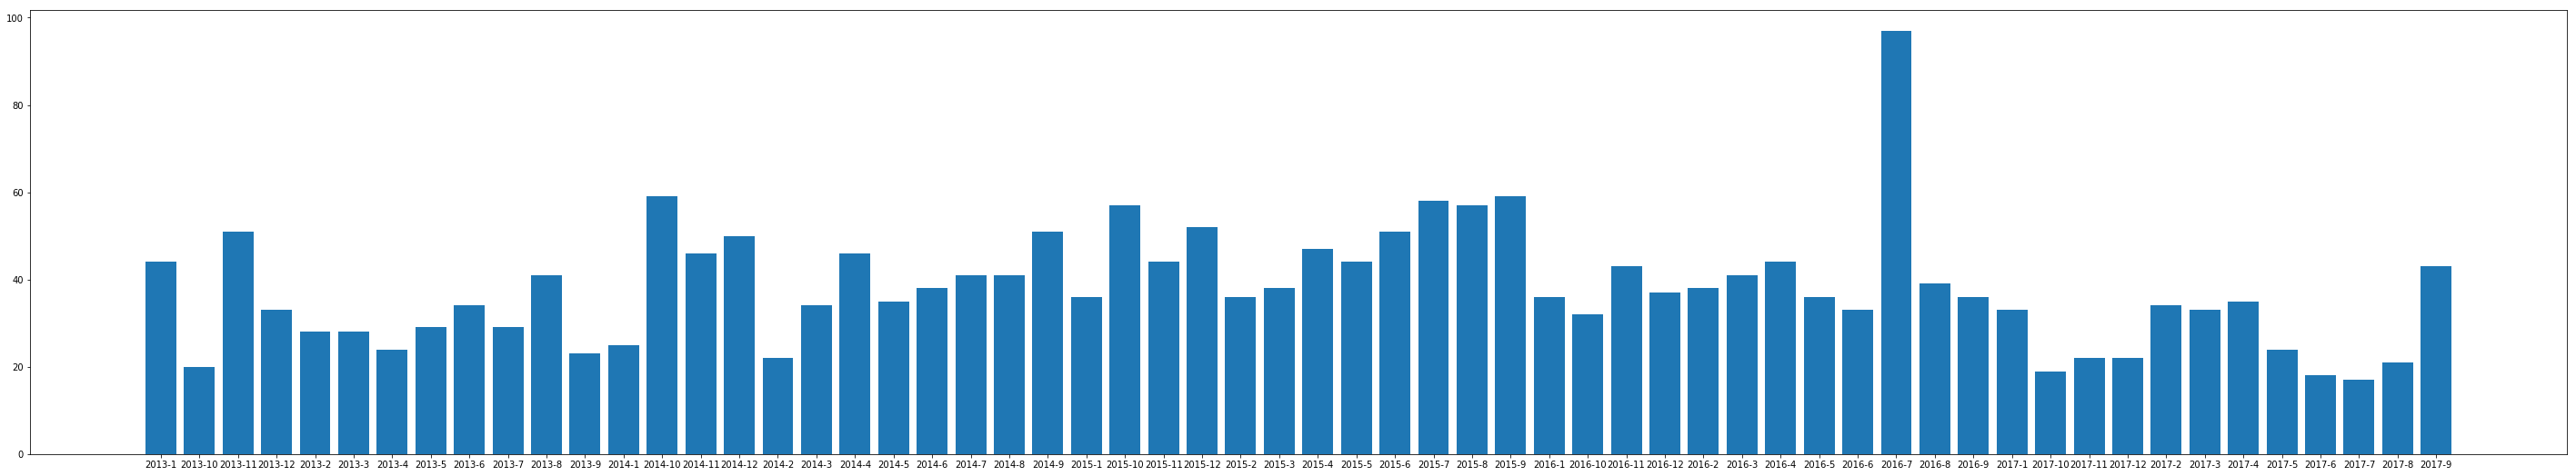

In [182]:
# 统计每个月的
df=stat_year_month.sort_values(by=['year','month'])
a=[];s=[];y_month=[]
for i in df['year']:
    a.append(str(i)+ '-')
for i in df['month']:
    s.append(str(i))
for i in range(len(s)):
    y_month.append(a[i]+s[i])

df['y_month']=y_month


plt.figure(1,figsize=(50,9))
plt.xticks(np.arange(len(y_month)),y_month)
plt.bar(y_month,df['num'])
plt.show()

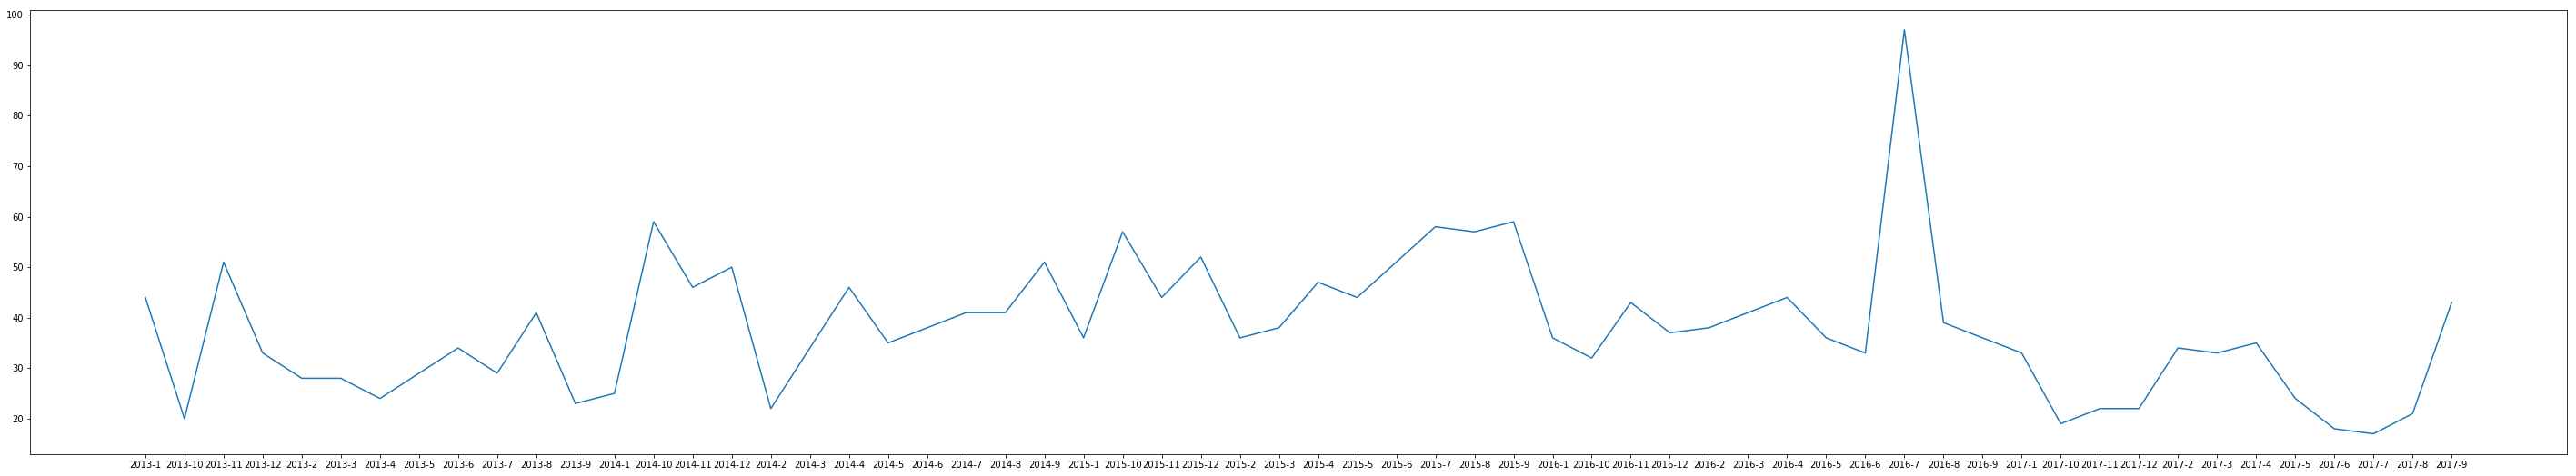

In [183]:
plt.figure(2,figsize=(50,9))
plt.xticks(np.arange(len(y_month)),y_month)
x_len=np.arange(len(y_month))
plt.plot(x_len,df['num'])
plt.show()

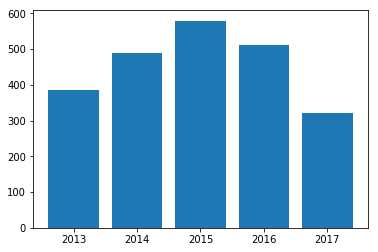

In [184]:
# 以年份为分组统计每年的过敏人数
stat_year=df.groupby('year')['num'].sum().to_frame().reset_index()
plt.bar(stat_year.year,stat_year.num)
plt.show()

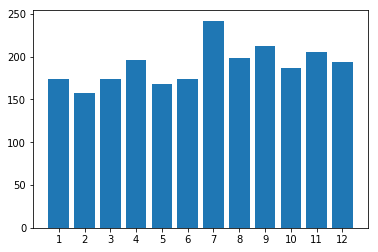

In [185]:
# 以月份统计每个月的过敏人数（不同年份的数据汇总在一起）
stat_month = df.groupby('month')['num'].sum().to_frame().reset_index()
stat_month['month']=pd.to_numeric(df.month)
df=stat_month.sort_values(by='month')
plt.figure(4)
plt.xticks(np.arange(1,13))
plt.bar(df.month,df.num)
plt.show()


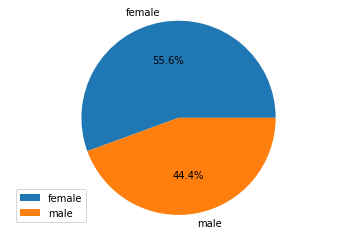

In [186]:
# 以性别为分组统计不同性别过敏人数
stat_sex = fr.groupby('性别').count().drop('未知')
stat_sex['count'] = stat_sex.iloc[:,1]
girls_num=stat_sex.loc['女']['count']
boys_num=stat_sex.loc['男']['count']
sex_num=[girls_num,boys_num]

plt.figure(5)
plt.pie(sex_num,labels=['female','male'],autopct = '%3.1f%%')
plt.axis('equal')
plt.legend()
plt.show()


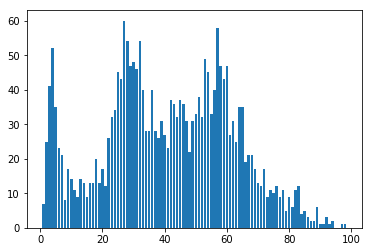

In [187]:
# 以年龄为分组
stat_age = fr.groupby('年龄')['date'].count().to_frame().reset_index()
stat_age['count']=stat_age['date']

plt.figure(6)
plt.bar(stat_age['年龄'],stat_age['count'])
plt.show()

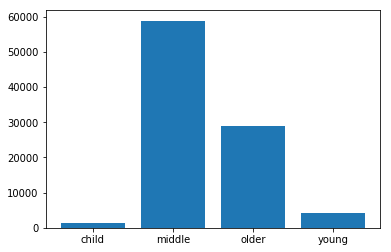

In [188]:
# 以年龄标签分组
stat_label=fr.groupby('label').sum()
sorted_stat_label=stat_label.sort_values(by='年龄')
sorted_stat_label=stat_label.sort_values(by='年龄')
x=['child','young','older','middle']
y=sorted_stat_label.iloc[:,0]

plt.figure(7)
plt.bar(x,y)
plt.show()

In [189]:
#不同月份下男女过敏统计人数
stat_sex_month = fr.groupby(['性别','month'])['label'].count().drop('未知').to_frame()

stat_sex_month

label
性别 month       
女  1        103
   10       109
   11       133
   12       110
   2         85
   3        101
   4        109
   5         88
   6        103
   7        100
   8        104
   9        124
男  1         71
   10        78
   11        73
   12        84
   2         73
   3         73
   4         87
   5         80
   6         70
   7        142
   8         95
   9         88

In [190]:
#不同人群下男女过敏统计人数
stat_sex_label = fr.groupby(['性别','label'])['label'].count().drop('未知').to_frame()
stat_sex_label

label
性别 label       
女  中年       819
   儿童       106
   老年       220
   青年       124
男  中年       576
   儿童       156
   老年       190
   青年        92